In [54]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
# Download the data

# Define the path to the JSON file
file_path = '/home/olivierpi/code/AlexRohn-96/shipvision_lewagon_backend/raw_data/shipsnet.json'

# Open and load the JSON file into a dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


In [6]:
data.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [11]:
data= pd.DataFrame(data)

In [15]:
X= data['data']
y=data['labels']

print(len(X))
print(len(y))

4000
4000


In [ ]:
print(len(image_data[1]))

(80, 80, 3)


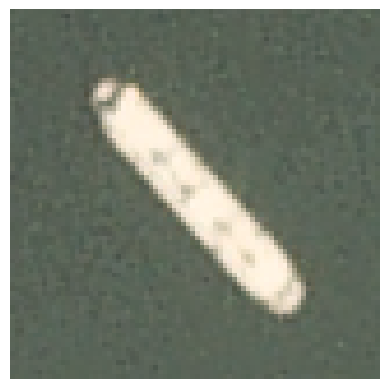

In [16]:
image = X[0]

# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

print(image_rgb.shape)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()


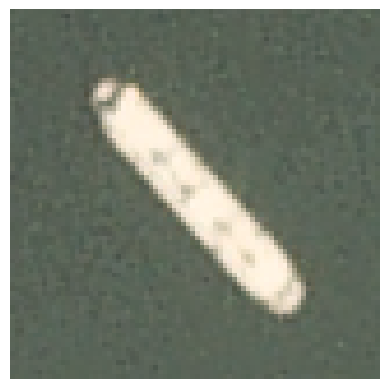

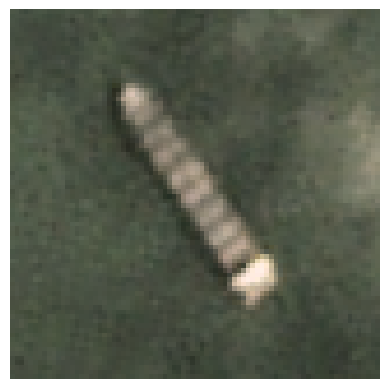

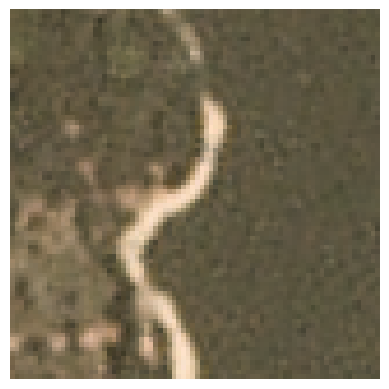

In [18]:
image = X[0]

R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()


image = X[1]

R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()



image = X[3200]

R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()

In [19]:
# First we need to split the set into training and test

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # Adjust the test size as needed
                                                    random_state=42,  # For reproducibility
                                                    stratify=labels)  # Ensures the proportion of classes is maintained

In [21]:
reshaped_images_train = []

for image in X_train:
    image_array = np.array(image)
    image_array = image_array/255
    # Extract the R, G, and B channels
    R_data = image_array[0:6400].reshape((80, 80))
    G_data = image_array[6400:2*6400].reshape((80, 80))
    B_data = image_array[2*6400:].reshape((80, 80))

    # Stack the R, G, and B channels to form the image
    image_rgb = np.stack((R_data, G_data, B_data), axis=-1)

    # Append the reshaped image to the list
    reshaped_images_train.append(image_rgb)


# Convert the list of reshaped images to a NumPy array
X_train_transformed = np.array(reshaped_images_train)


reshaped_images_test = []

for image in X_test:
    image_array = np.array(image)
    image_array = image_array/255
    # Extract the R, G, and B channels
    R_data = image_array[0:6400].reshape((80, 80))
    G_data = image_array[6400:2*6400].reshape((80, 80))
    B_data = image_array[2*6400:].reshape((80, 80))

    # Stack the R, G, and B channels to form the image
    image_rgb = np.stack((R_data, G_data, B_data), axis=-1)

    # Append the reshaped image to the list
    reshaped_images_test.append(image_rgb)


# Convert the list of reshaped images to a NumPy array
X_test_transformed = np.array(reshaped_images_test)







# Check the shape of the resulting tensor
print(X_train_transformed.shape)  # Should output (2800, 80, 80, 3)
print(X_test_transformed.shape)   # Should output (1200, 80, 80, 3)

(2800, 80, 80, 3)
(1200, 80, 80, 3)


In [116]:
# Initialize CNN with input shape of 80x80x3 (80x80 images with 3 channels - RGB)

def initialize_model():

    model = Sequential()


    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(80, 80, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (4,4), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer - Classification Layer with 2 outputs
    model.add(layers.Dense(1, activation='sigmoid'))



    return model

In [95]:
# Define the Neural Network
def initialize_model_2():

    model = Sequential()

    model.add(layers.RandomFlip("horizontal"))

    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3),activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())



    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [117]:
# Initialize model

model = initialize_model()


In [118]:
from tensorflow.keras.metrics import Precision, Recall
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])


In [119]:
# Fit model

es = EarlyStopping(patience= 3,restore_best_weights=True)

history = model.fit(X_train_transformed, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/10
70/70 [==============================] - 5s 40ms/step - loss: 0.5087 - accuracy: 0.7402 - precision_10: 0.1562 - recall_10: 0.0089 - val_loss: 0.3901 - val_accuracy: 0.7500 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/10
70/70 [==============================] - 1s 20ms/step - loss: 0.3429 - accuracy: 0.8085 - precision_10: 0.8018 - recall_10: 0.3107 - val_loss: 0.3018 - val_accuracy: 0.8911 - val_precision_10: 0.8496 - val_recall_10: 0.6857
Epoch 3/10
70/70 [==============================] - 1s 19ms/step - loss: 0.2906 - accuracy: 0.8996 - precision_10: 0.8143 - recall_10: 0.7750 - val_loss: 0.2863 - val_accuracy: 0.9107 - val_precision_10: 0.7744 - val_recall_10: 0.9071
Epoch 4/10
70/70 [==============================] - 1s 18ms/step - loss: 0.2724 - accuracy: 0.9187 - precision_10: 0.8327 - recall_10: 0.8446 - val_loss: 0.2600 - val_accuracy: 0.9357 - val_precision_10: 0.8611 - val_recall_10: 0.8857
Epoch 5/10
70/70 [==============================] - 

In [120]:
# Evaluate model

evaluation = model.evaluate(X_test_transformed, y_test)

print("Test Metrics: ", evaluation)

38/38 [==============================] - 0s 8ms/step - loss: 0.2179 - accuracy: 0.9242 - precision_10: 0.8616 - recall_10: 0.8300
Test Metrics:  [0.21790064871311188, 0.9241666793823242, 0.8615916967391968, 0.8299999833106995]


In [124]:
import numpy as np
from PIL import Image, ImageDraw
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import time
# Define the image path
image_path = "/home/olivierpi/code/AlexRohn-96/shipvision_lewagon_backend/raw_data/scenes/scenes/lb_1.png"
# Load the image
image = Image.open(image_path)
img_array=np.array(image)
# Define parameters
patch_size = 80
stride = 20
# Create a copy of the cropped image for drawing the red boxes
output_image = image.copy()
draw = ImageDraw.Draw(output_image)
# Initialize variables
img_height, img_width = img_array.shape[:2]
patches = []
coordinates = []
# Extract patches and their coordinates
for y in range(0, img_height - patch_size + 1, stride):
    for x in range(0, img_width - patch_size + 1, stride):
        sub_image = img_array[y:y+patch_size, x:x+patch_size]
        patches.append(sub_image)
        coordinates.append((x, y))
# Convert patches to numpy array
patches_array = np.array(patches) / 255.0  # Normalize
# Preprocess patches for model input
preprocessed_patches = patches_array.reshape(-1, patch_size, patch_size, 3)
# Perform batch prediction
start_time = time.time()
predictions = model.predict(preprocessed_patches, verbose=0)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")
# Draw rectangles for patches classified as containing a ship
for idx, prediction in enumerate(predictions):
    if prediction[0] > 0.7:
        x, y = coordinates[idx]
        draw.rectangle([x, y, x + patch_size, y + patch_size], outline="red", width=2)


Prediction time: 15.08 seconds


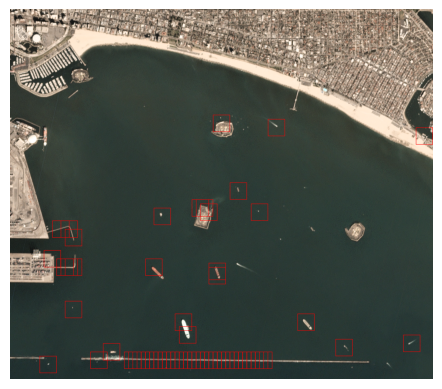

In [125]:
# Display the output image with red boxes
plt.imshow(output_image)
plt.axis('off')  # Hide the axis
plt.show()

In [106]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_7', 'recall_7', 'val_loss', 'val_accuracy', 'val_precision_7', 'val_recall_7'])

In [122]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('recall')
    ax[1].plot(history.epoch, history.history["recall_10"], label="recall")
    ax[1].plot(history.epoch, history.history["val_recall_10"], label="Validation rec")
    ax[0].legend()
    ax[1].legend()

In [101]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

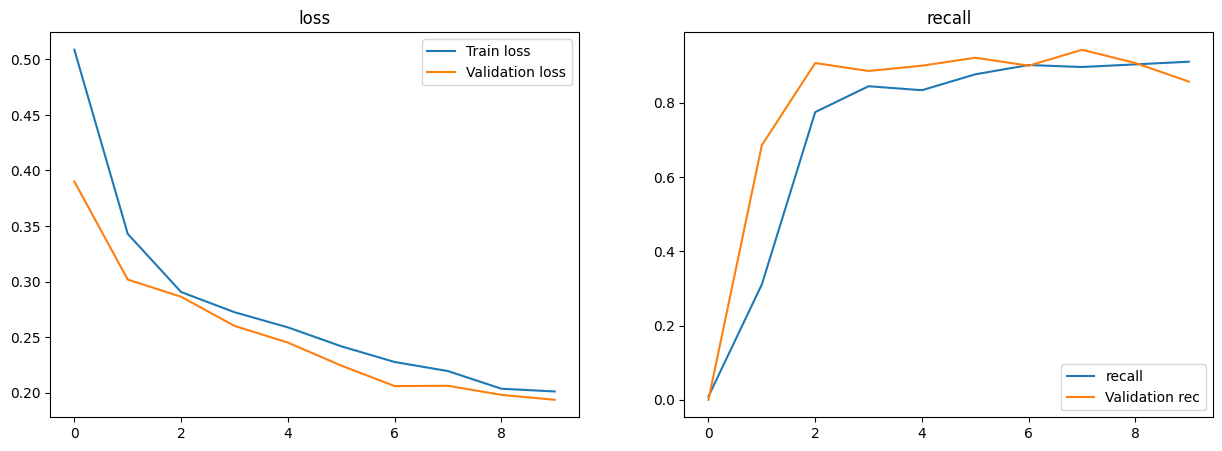

In [123]:
plot_history(history)

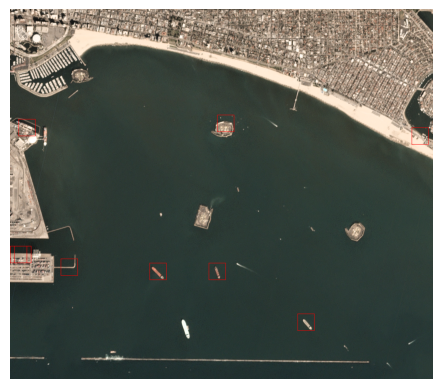

In [48]:
y_pred= model.predict(X_test_transformed)
y_pred

38/38 [==============================] - 0s 6ms/step


array([[1.7761584e-01],
       [1.0400948e-05],
       [4.3999231e-03],
       ...,
       [4.7990909e-01],
       [6.2477946e-01],
       [3.6470656e-04]], dtype=float32)

In [49]:
y_test

686     1
2685    0
3447    0
1248    0
766     1
       ..
3635    0
1928    0
1378    0
200     1
2493    0
Name: labels, Length: 1200, dtype: int64

In [53]:
predicted_probabilities= model.predict(X_test_transformed)  # Predicted classes (0 or 1)
predicted_class = (predicted_probabilities >= 0.5).astype(int)
# `y_test` is already in the format of class labels (0 or 1)
true_class = y_test  # Directly use `y_test`

# Check if y_test is a pandas DataFrame or Series, and convert if necessary
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    true_class = y_test.values.ravel()  # Convert to a flat array or list
else:
    true_class = y_test  # If it's already a list or NumPy array

# Ensure predicted_class and true_class have the same length
print('Length of predicted_class:', len(predicted_class))
print('Length of true_class:', len(true_class))
correct = []
incorrect = []

# Loop through predictions and compare them to true labels
for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

# Output the number of correct and incorrect predictions
print('Correct predictions: ', len(correct))
print('Incorrect predictions: ', len(incorrect))
print('ratio correct',len(correct)/1200 )

38/38 [==============================] - 0s 8ms/step
Length of predicted_class: 1200
Length of true_class: 1200
Correct predictions:  1124
Incorrect predictions:  76
ratio correct 0.9366666666666666


In [ ]:
# Loading most recent model and evaluating it

from tensorflow import keras

# Get the latest model version name by the timestamp on disk
local_model_directory = os.path.join(LOCAL_REGISTRY_PATH, "models")
local_model_paths = glob.glob(f"{local_model_directory}/*")

most_recent_model_path_on_disk = sorted(local_model_paths)[-1]

latest_model = keras.models.load_model(most_recent_model_path_on_disk)

evaluation = latest_model.evaluate(X_test_tensor, y_test_cat)

accuracy = evaluation[1]

accuracy

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9302 - loss: 0.1591


0.9275000095367432